In [13]:
import pandas as pd 
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go 
import numpy  as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_concorrencia = pd.read_excel('base_concorrência_sp_sprm.xlsx')

In [ ]:
#Dados do Geoimóvel - Produtos de SP com preço médio de acima de 90K e menor que 300K

In [5]:
df_concorrencia.head()

,CONSTRUTORA,EMPRESA,REGIAO,UF,CIDADE,EMPREENDIMENTO,ANO_PESQUISA,DT_PESQUISA,DT_LANCAMENTO,PM,VSO,UM_DISP,ESTOQUE
0,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,AGUAS CLARAS,2020,2020-12-14,2020-09-01,191083,147,348,201
1,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,AGUAS CLARAS,2021,2021-01-18,2020-09-01,190003,155,348,193
2,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,ALTOS DE ITAQUERA,2020,2020-12-14,2019-06-01,147997,395,396,1
3,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,ALTOS DE ITAQUERA,2021,2021-01-18,2019-06-01,147997,395,396,1
4,CONSTRUTORA TENDA S/A,TENDA,SP,SP,SAO PAULO,ALTOS DE ITAQUERA,2019,2019-12-16,2019-06-01,156063,129,396,267


In [8]:
df_concorrencia['chave_prd'] = df_concorrencia.EMPRESA +"- " + df_concorrencia.EMPREENDIMENTO

In [10]:
df_concorrencia.EMPRESA.drop_duplicates().values

array(['TENDA', 'CURY', 'DIRECIONAL', 'MRV', 'PLANO E PLANO', 'VIVAZ'],
      dtype=object)

In [11]:
df_concorrencia.EMPRESA.nunique()

6

In [12]:
df_concorrencia.EMPREENDIMENTO.nunique()

211

In [ ]:
#Verificando distribuição de Preço e VSO

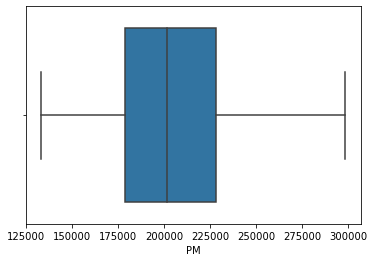

In [14]:
sns.boxplot(df_concorrencia.PM)

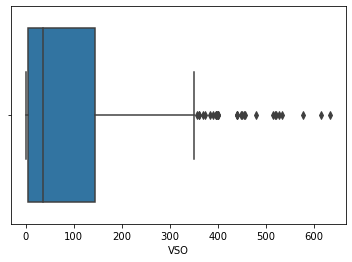

In [15]:
sns.boxplot(df_concorrencia.VSO)

In [ ]:
#Filtrando produtos com mais de 10 unidades em estoque

In [16]:
mask_estoque = df_concorrencia.ESTOQUE > 10 

In [76]:
df_concorrencia_filtro = df_concorrencia.loc[mask_estoque].groupby(['EMPRESA','chave_prd','ANO_PESQUISA'],as_index=False).agg({'PM':'mean',
                                                                                                             'VSO':'sum',
                                                                                                             'UM_DISP':'sum',                
                                                                                                             'ESTOQUE':'sum'})

In [77]:
x = df_concorrencia_filtro[['PM']]

In [ ]:
#Defininco nº de Clusters

1 189787368501.00485
2 64205294419.62861
3 31689825424.525406
4 19449338193.035934
5 14381282848.135088
6 10488769997.902195
7 7826108396.416705
8 6462583588.613999
9 4477581143.808573
10 3804257355.2707663


<IPython.core.display.Javascript object>


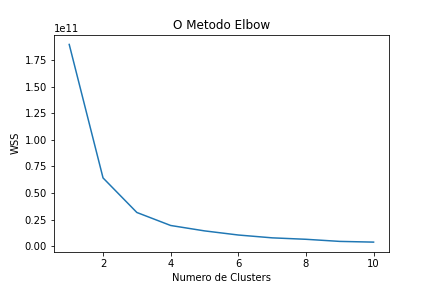

In [81]:
#definir o número de grupos de agentes ideal
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(x)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [79]:
kmeans = KMeans(n_clusters = 3, init = 'random', random_state=28)
kmeans.fit(x)
distance = kmeans.fit_transform(x)

<IPython.core.display.Javascript object>


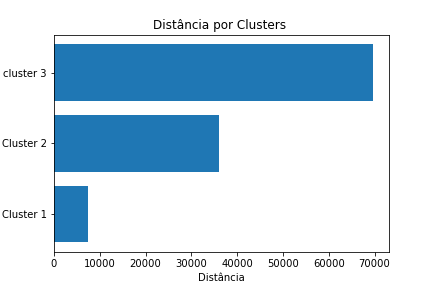

In [80]:
%matplotlib notebook
l = ['Cluster 1','Cluster 2', 'cluster 3']
plt.barh(l,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

In [82]:
x['Cluster'] = kmeans.labels_

<ipython-input-82-43eca371b81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = kmeans.labels_


In [83]:
kmeans.labels_

array([0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2])

In [84]:
x.groupby('Cluster')['PM'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,79.00,"166,474.47","9,906.42","133,000.00","161,746.00","167,900.00","172,793.75","180,000.00"
1,113.00,"194,940.01","7,844.21","182,041.00","189,135.00","193,866.67","201,099.00","211,180.00"
2,84.00,"228,623.86","14,371.82","212,233.00","218,873.25","224,975.00","235,195.75","295,920.00"


In [ ]:
#Renomeando Cluster

In [85]:
nomes = {0:'Mass',
         1: 'Masstige',
         2: 'Prestige'}

In [86]:
x['nome_cluster'] = x.Cluster.map(nomes)

<ipython-input-86-9f9ef7cc84ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nome_cluster'] = x.Cluster.map(nomes)


In [87]:
df_concorrencia_filtro['nome_cluster'] = x['nome_cluster']

In [88]:
df_concorrencia_filtro.head()

,EMPRESA,chave_prd,ANO_PESQUISA,PM,VSO,UM_DISP,ESTOQUE,nome_cluster
0,CURY,CURY- DEZ ANHAIA MELLO,2019,"159,000.00",62,110,48,Mass
1,CURY,CURY- DEZ CURSINO,2019,"200,256.50",112,337,225,Masstige
2,CURY,CURY- DEZ CURSINO,2020,"217,129.00",187,202,15,Prestige
3,CURY,CURY- DEZ CURY CANINDE,2021,"194,800.00",117,876,759,Masstige
4,CURY,CURY- DEZ GAMELINHA,2019,"201,099.00",304,363,59,Masstige


In [89]:
df_concorrencia_filtro.groupby('nome_cluster')['PM'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Mass,79.00,"166,474.47","9,906.42","133,000.00","161,746.00","167,900.00","172,793.75","180,000.00"
Masstige,113.00,"194,940.01","7,844.21","182,041.00","189,135.00","193,866.67","201,099.00","211,180.00"
Prestige,84.00,"228,623.86","14,371.82","212,233.00","218,873.25","224,975.00","235,195.75","295,920.00"


In [90]:
pd.pivot_table(df_concorrencia_filtro, values=['chave_prd', 'PM','VSO','UM_DISP','ESTOQUE'], index=['EMPRESA','ANO_PESQUISA','nome_cluster'],
                    aggfunc={
                             'PM': np.mean,
                             'UM_DISP': np.sum,
                             'VSO': np.sum,
                             'ESTOQUE': np.sum, 
                             'chave_prd': np.size}).round(2)

ESTOQUE         PM  UM_DISP   VSO  \
EMPRESA       ANO_PESQUISA nome_cluster                                      
CURY          2019         Mass              185 168,603.60      805   620   
                           Masstige         1488 197,593.19     3186  1698   
                           Prestige          223 227,191.00      333   110   
              2020         Mass              223 179,251.00      490   267   
                           Masstige          260 197,555.58     1183   923   
                           Prestige         1036 222,475.60     2022   986   
              2021         Masstige         1178 197,326.94     2549  1371   
                           Prestige          959 222,455.31     1749   790   
DIRECIONAL    2019         Masstige          315 197,000.00      780   465   
                           Prestige          328 219,050.00      678   350   
              2020         Mass              184 180,000.00      216    32   
                           Masstige          114 202,250.00      414   300   
                           Prestige           13 226,300.00      188   175   
              2021         Mass              172 180,000.00      216    44   
                           Masstige           90 198,000.00      224   134   
MRV           2019         Mass             1031 164,098.67     2055  1024   
                           Masstige          749 193,600.00     1294   545   
                           Prestige          893 234,047.00     2728  1835   
              2020         Mass              784 166,238.33     2477  1693   
                           Masstige         1281 196,825.00     2425  1144   
                           Prestige          902 230,937.50     2601  1699   
              2021         Mass              147 179,900.00      450   303   
                           Masstige          372 202,150.00     1210   838   
                           Prestige          920 232,901.38     2226  1306   
PLANO E PLANO 2019         Mass             2033 167,501.36     3775  1742   
                           Masstige         2860 195,857.69     4479  1619   
                           Prestige         1459 225,564.39     2408   949   
              2020         Mass             2502 169,752.35     2779   277   
                           Masstige         3614 190,120.45     6094  2480   
                           Prestige         2880 223,915.88     4537  1657   
              2021         Mass             1311 173,306.00     1397    86   
                           Masstige         4750 192,821.87     7401  2651   
                           Prestige         1974 229,853.73     3436  1462   
TENDA         2019         Mass             1483 155,813.50     2680  1197   
                           Masstige          280 186,853.00      611   331   
              2020         Mass             1049 166,819.90     3330  2281   
                           Masstige          916 194,250.00     1535   619   
              2021         Mass              872 162,053.62     2766  1894   
                           Masstige          857 193,968.00     1055   198   
VIVAZ         2019         Mass              438 172,494.50      480    42   
                           Masstige         1654 201,267.72     2179   525   
                           Prestige          725 218,428.33      823    98   
              2020         Mass              173 158,630.00      351   178   
                           Masstige         1462 194,749.36     2375   913   
                           Prestige          831 230,734.74     2317  1486   
              2021         Mass              384 179,000.00      404    20   
                           Masstige          785 196,196.58     1723   938   
                           Prestige         1475 234,028.54     2839  1364   

                                         chave_prd  
EMPRESA       ANO_PESQUISA nome_cluster             
CURY          2019         Mass   

In [91]:
df_concorrencia_filtro

,EMPRESA,chave_prd,ANO_PESQUISA,PM,VSO,UM_DISP,ESTOQUE,nome_cluster
0,CURY,CURY- DEZ ANHAIA MELLO,2019,"159,000.00",62,110,48,Mass
1,CURY,CURY- DEZ CURSINO,2019,"200,256.50",112,337,225,Masstige
2,CURY,CURY- DEZ CURSINO,2020,"217,129.00",187,202,15,Prestige
3,CURY,CURY- DEZ CURY CANINDE,2021,"194,800.00",117,876,759,Masstige
4,CURY,CURY- DEZ GAMELINHA,2019,"201,099.00",304,363,59,Masstige
...,...,...,...,...,...,...,...,...
271,VIVAZ,VIVAZ- VIVAZ TRANSAMERICA 2,2020,"191,200.50",41,356,315,Masstige
272,VIVAZ,VIVAZ- VIVAZ VILA GUILHERME,2020,"191,748.00",197,595,398,Masstige
273,VIVAZ,VIVAZ- VIVAZ VILA GUILHERME,2021,"199,403.00",577,595,18,Masstige
274,VIVAZ,VIVAZ- VIVAZ VILA ROMANA,2020,"206,210.50",70,376,306,Masstige


In [92]:
df_param_cluster = df_concorrencia_filtro.groupby(['EMPRESA','ANO_PESQUISA', 'nome_cluster'],as_index= False).agg({'chave_prd':'count',
                                                                                'PM': 'mean',
                                                                                'VSO': 'sum',
                                                                                 'UM_DISP':'sum',
                                                                                'ESTOQUE': 'sum'}).round(2)

In [ ]:
#Base Final Clusterizada

In [93]:
df_param_cluster

,EMPRESA,ANO_PESQUISA,nome_cluster,chave_prd,PM,VSO,UM_DISP,ESTOQUE
0,CURY,2019,Mass,5,"168,603.60",620,805,185
1,CURY,2019,Masstige,9,"197,593.19",1698,3186,1488
2,CURY,2019,Prestige,1,"227,191.00",110,333,223
3,CURY,2020,Mass,1,"179,251.00",267,490,223
4,CURY,2020,Masstige,4,"197,555.58",923,1183,260
5,CURY,2020,Prestige,5,"222,475.60",986,2022,1036
6,CURY,2021,Masstige,6,"197,326.94",1371,2549,1178
7,CURY,2021,Prestige,3,"222,455.31",790,1749,959
8,DIRECIONAL,2019,Masstige,2,"197,000.00",465,780,315
9,DIRECIONAL,2019,Prestige,2,"219,050.00",350,678,328


In [61]:
%matplotlib inline

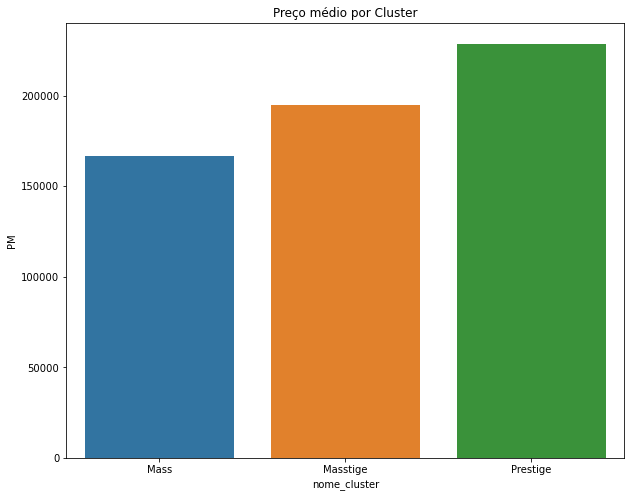

In [67]:
plt.subplots(1,figsize=(10,8))
sns.barplot(data = df_concorrencia_filtro.groupby('nome_cluster',as_index= False).PM.mean(),
           x = 'nome_cluster', y = 'PM')
plt.title('Preço médio por Cluster');

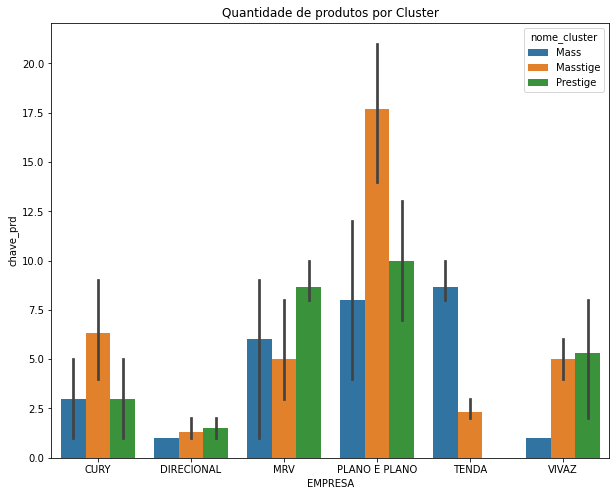

In [66]:
plt.subplots(1,figsize=(10,8))
sns.barplot(data = df_param_cluster, x = df_param_cluster['EMPRESA'],
            y = 'chave_prd', hue = 'nome_cluster')
plt.title('Quantidade de produtos por Cluster');

In [94]:
df_param_cluster.to_csv('clustertenda_concorrencia_v3.csv',sep=';',decimal=',')